# Linear and Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('water_potability.csv')

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [7]:
df.shape

(3276, 10)

In [8]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [9]:
df["Potability"].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [10]:
df.fillna(df.mean(), inplace=True)

In [11]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [12]:
X=df.drop("Potability",axis=1)
headers = X.columns
y=df["Potability"]

In [13]:
X.shape, y.shape

((3276, 9), (3276,))

In [14]:
headers

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
X = pd.DataFrame(scaled_data, columns=headers)

In [16]:
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-6.043133e-16,0.259195,-0.139471,0.112415,9.613574e-01,1.708954,-1.180651,1.306149,-1.286298
1,-2.289339e+00,-2.036414,-0.385987,-0.307694,3.145987e-15,2.062575,0.270597,-0.638480,0.684218
2,6.928678e-01,0.847665,-0.240047,1.360594,3.145987e-15,-0.094032,0.781117,0.001509,-1.167365
3,8.409504e-01,0.547651,0.000493,0.592008,6.395190e-01,-0.778830,1.255134,2.152874,0.848412
4,1.368569e+00,-0.464429,-0.460249,-0.363698,-6.541765e-01,-0.343939,-0.824357,-2.181599,0.138786


In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=42, stratify=df["Potability"], shuffle=True)

In [18]:
y_train.value_counts()

0    1598
1    1022
Name: Potability, dtype: int64

In [19]:
y_test.value_counts()

0    400
1    256
Name: Potability, dtype: int64

# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#creating a mobel object
model_lr=LogisticRegression()

In [21]:
#training model
model_lr.fit(x_train,y_train)

LogisticRegression()

In [22]:
#making prediction
pred_lr = model_lr.predict(x_test)

In [23]:
#accuracy score
accuracy_score_lr = accuracy_score(y_test,pred_lr)
accuracy_score_lr

0.6097560975609756

In [24]:
logreg_model=LogisticRegression(solver='lbfgs', max_iter=4000)
logreg_model.fit(x_train,y_train)
y_pre=logreg_model.predict(x_train)
y_pred=logreg_model.predict(x_test)
y_pred1=logreg_model.predict_proba(x_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Training Accuracy_score: {}".format(accuracy_score(y_train,y_pre)))
print("Testing Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))
print("CV_score: {}".format(cross_val_score(logreg_model, X, y, cv=10, scoring='accuracy').mean()))

Training Accuracy_score: 0.6099236641221374
Testing Accuracy_score: 0.6097560975609756
roc_auc_score: 0.5484277343749999
CV_score: 0.6101961661818454


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Specify parameters

c_values = list(np.arange(1, 10))

param_grid = [
    {'C': c_values, 'penalty': ['l1'], 'solver' : ['liblinear'], 'multi_class' : ['ovr']},
    {'C': c_values, 'penalty': ['l2'], 'solver' : ['liblinear', 'newton-cg', 'lbfgs'], 'multi_class' : ['ovr']}
]
grid = GridSearchCV(logreg_model, param_grid, cv=10, scoring='accuracy')
grid.fit(x_train,y_train)
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)
predictionforest = grid.best_estimator_.predict(x_test)
y_pred2=grid.best_estimator_.predict_proba(x_test)


print(confusion_matrix(y_test,predictionforest))
#print ("{0}".format(metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])))
print ("Classification Report")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, predictionforest, labels=[1, 0])))
acc_hyper = accuracy_score(y_test,predictionforest)
print (acc_hyper)
print("roc_auc_score after hypertuning: {}".format(roc_auc_score(y_test,y_pred2[:,1])))
print("roc_auc_score original: {}".format(roc_auc_score(y_test,y_pred1[:,1])))
print("CV_score: {}".format(cross_val_score(logreg_model, X, y, cv=10, scoring='accuracy').mean()))

{'C': 1, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}
0.6099236641221374
LogisticRegression(C=1, max_iter=4000, multi_class='ovr', penalty='l1',
                   solver='liblinear')
[[400   0]
 [256   0]]
Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       256
           0       0.61      1.00      0.76       400

    accuracy                           0.61       656
   macro avg       0.30      0.50      0.38       656
weighted avg       0.37      0.61      0.46       656

0.6097560975609756
roc_auc_score after hypertuning: 0.548564453125
roc_auc_score original: 0.5484277343749999
CV_score: 0.6101961661818454


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


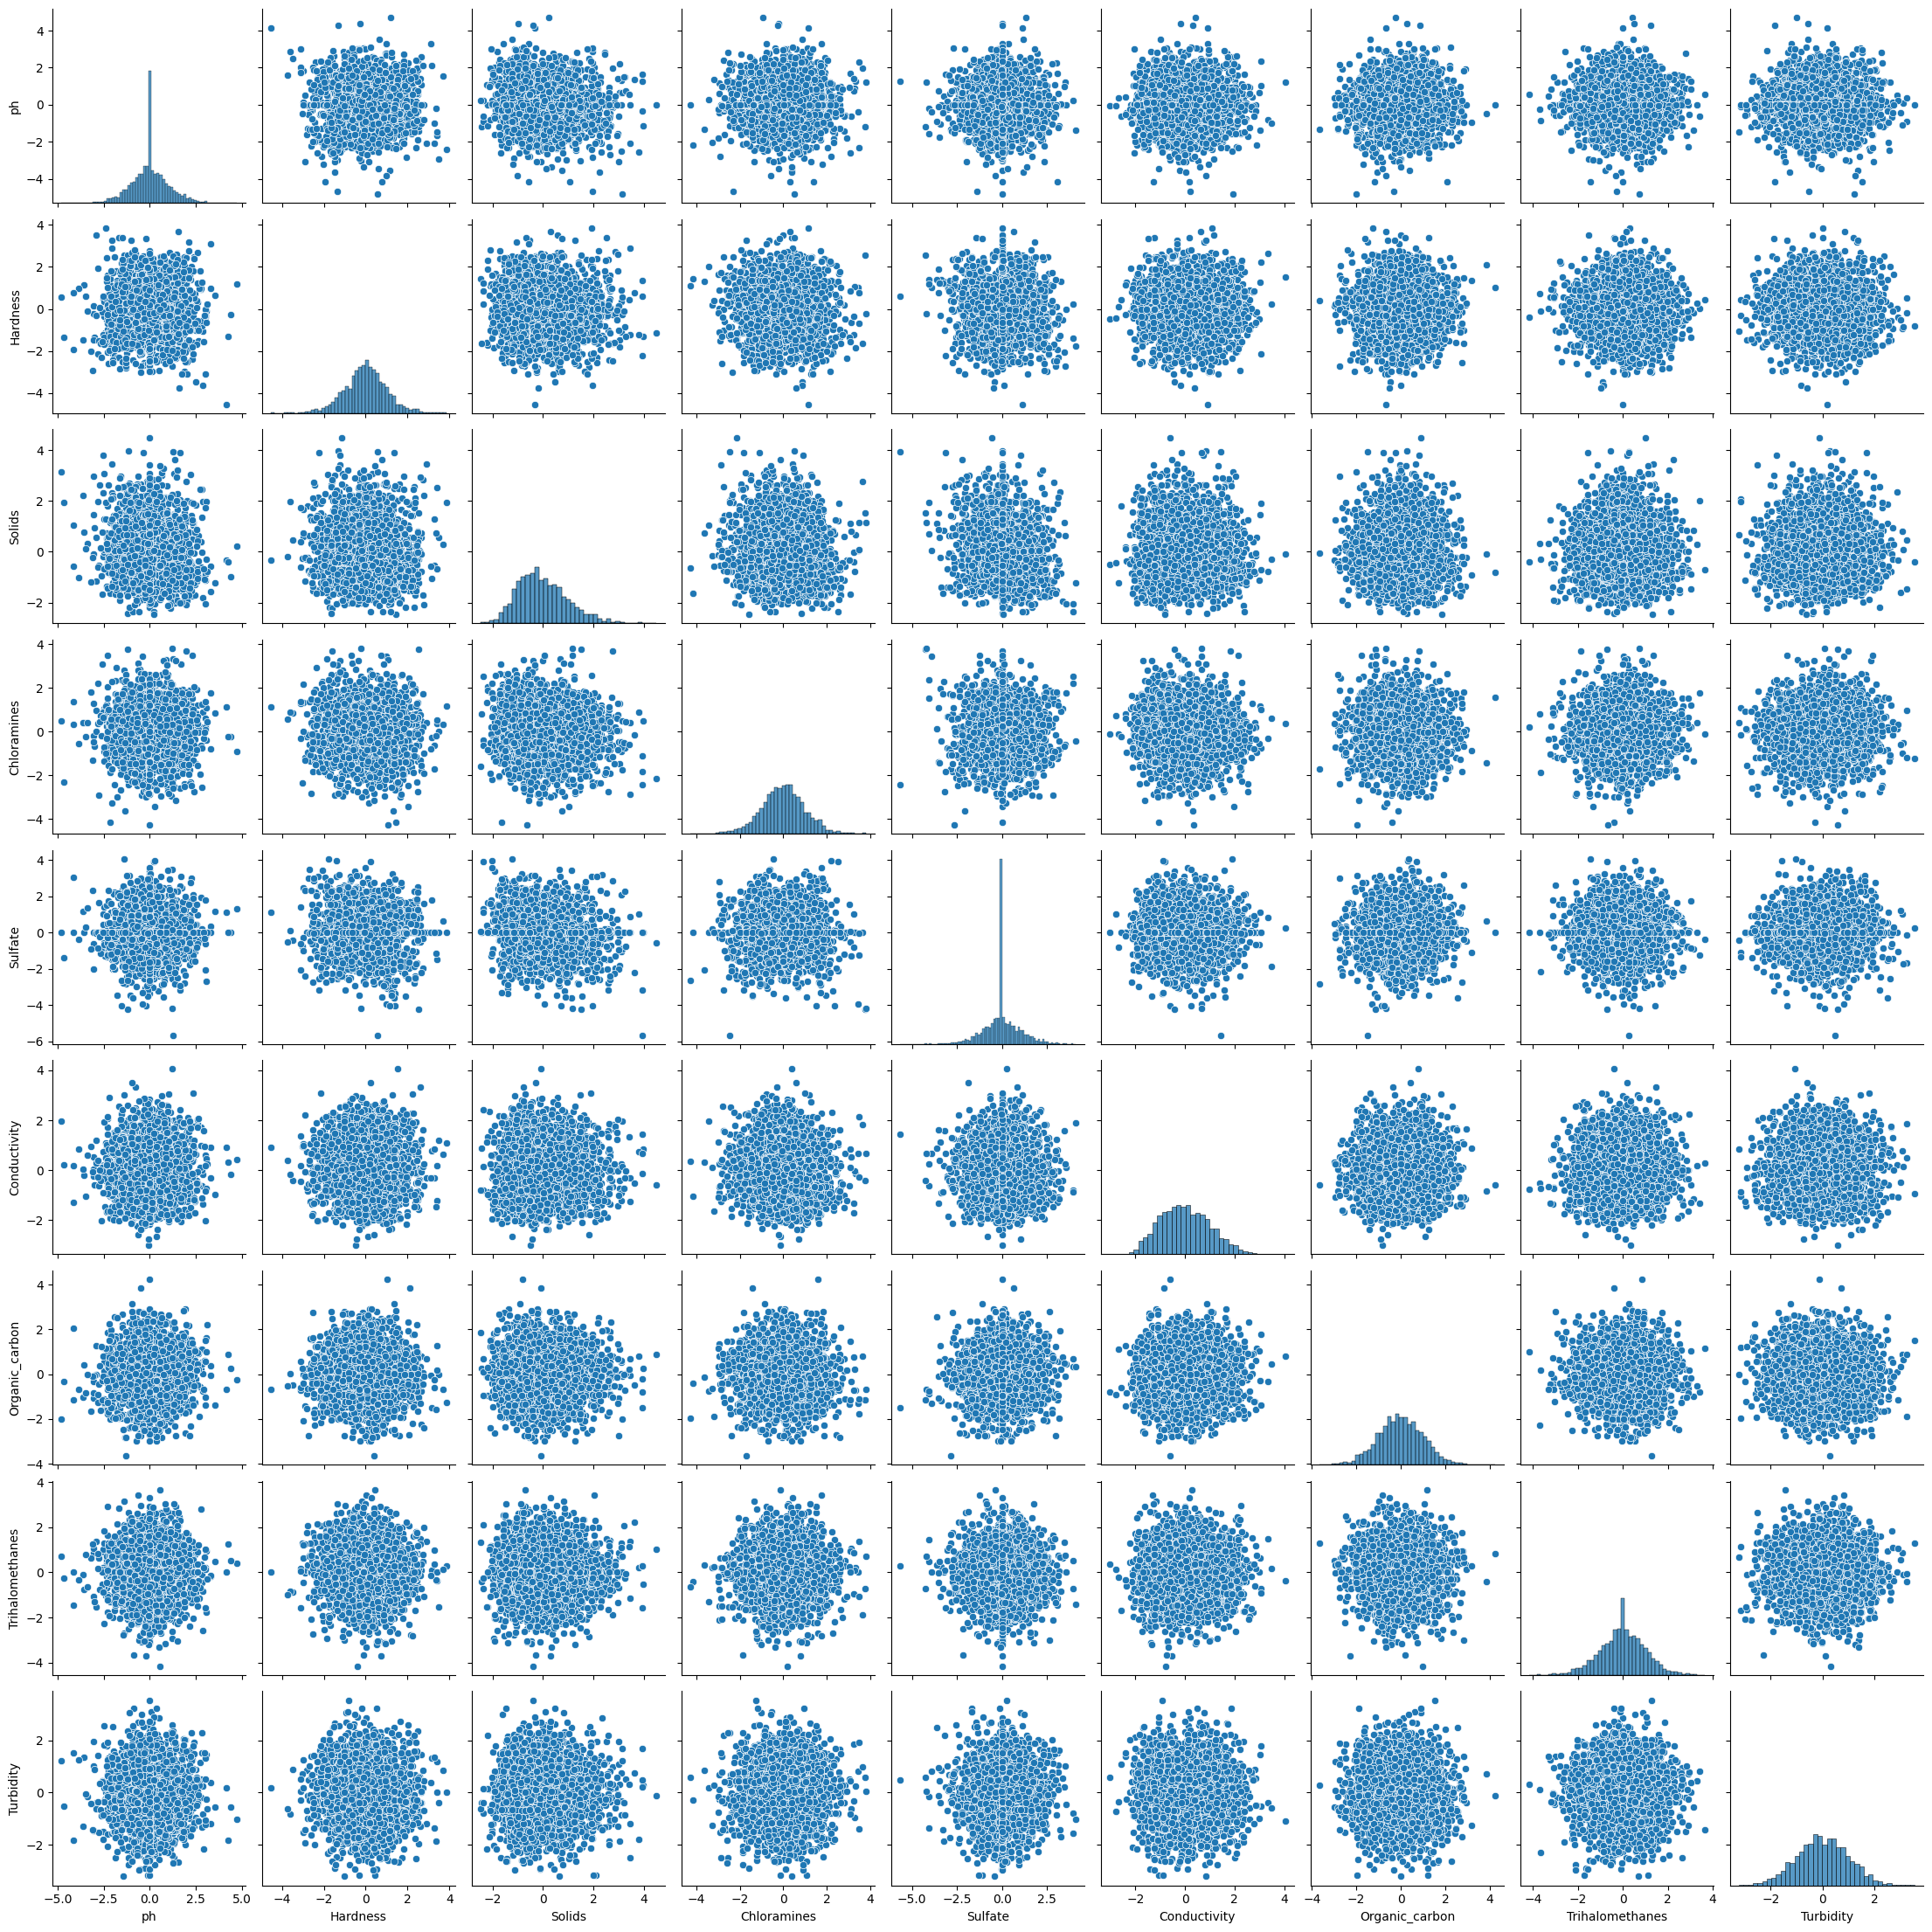

In [27]:
sns.pairplot(X)

<Axes: >

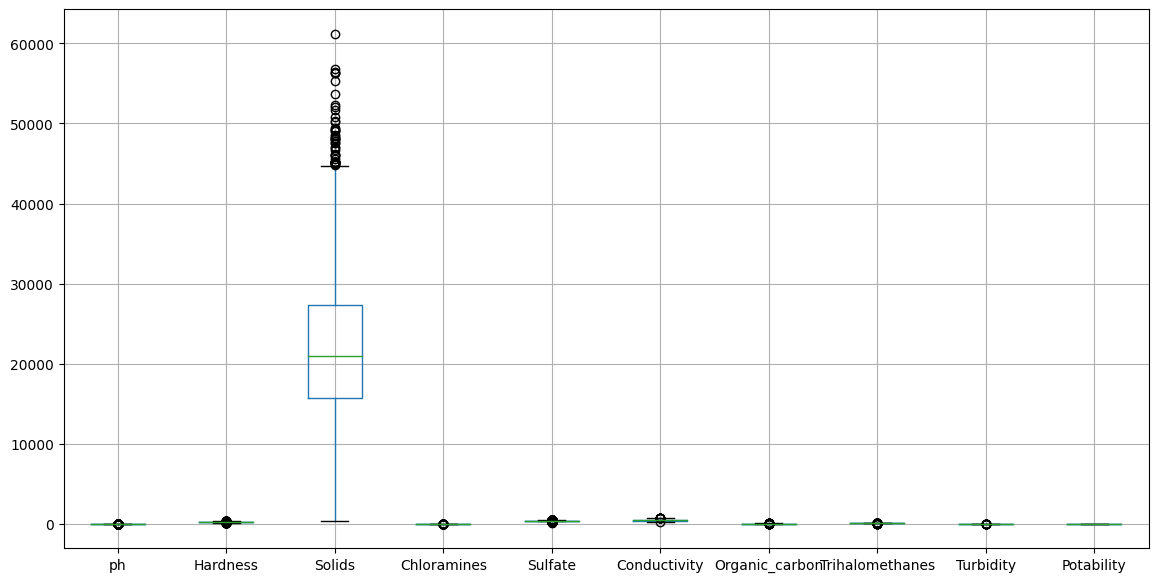

In [28]:
df.boxplot(figsize=(14,7))


In [29]:
# Add a column of ones to X for the intercept term
x = np.column_stack((np.ones(X.shape), X))

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate the coefficients using the pseudoinverse
coefficients = np.linalg.pinv(x_train) @ y_train

# Extract the intercept and slope
intercept = coefficients[0]
slope = coefficients[1]

print("Intercept:", intercept)
print("Slope:", slope)

Intercept: -0.0012832720388118992
Slope: -0.007050810702536804


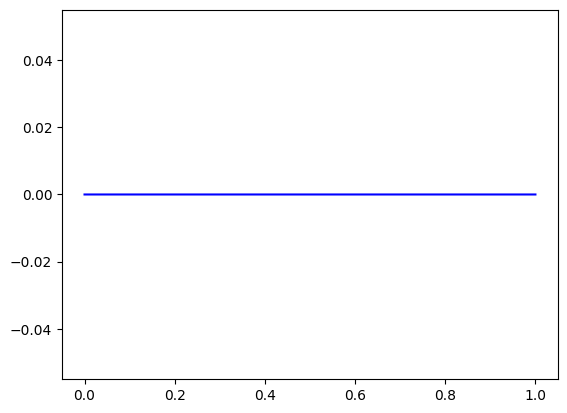

In [30]:
plt.plot(y_train, model_lr.predict(x_train), color = 'blue', label='Model Plot')


In [31]:
sst = 0
ssr = 0

for i in range(len(x)):
    sst += (y[i] - np.mean(y)) ** 2


In [32]:
y_true = np.array([1, 2, 3, 4, 5])
y_pred = np.array([1.5, 2.5, 2.8, 4.2, 4.9])
# Calculate the MAE

from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, mean_absolute_error,mean_squared_error,r2_score

mae = mean_absolute_error(y_true, y_pred)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y_true, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_true, y_pred)
print("R2 score:", r2)

Mean Absolute Error: 0.3
Mean Squared Error: 0.118
R2 score: 0.9410000000000001


In [33]:
import statsmodels.api as sm

#define response variable
y = df['Potability']

#define predictor variable
x = df[['Potability']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#calculate sse
sse = np.sum((model.fittedvalues - df.Potability)**2)
print(sse)



3.977173241305345e-26


In [34]:
#define response variable
y = df['Potability']

#define predictor variable
x = df[['Potability']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#display adjusted R-squared
print(model.rsquared_adj)

1.0


# Support vector machine(SVM)


In [35]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming you have features (X) and labels (y) ready
X=df.drop("Potability",axis=1)
headers = X.columns
y=df["Potability"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier (Support Vector Classifier) with a linear kernel
svm_classifier = SVC(kernel='rbf', C=1.0)

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate and print the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6280487804878049


In [36]:
#confusion matrix
cm5 = confusion_matrix(y_test,y_pred)
cm5

array([[412,   0],
       [244,   0]])

In [37]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Load the preprocessed dataset (replace with your actual file path)
data_subset = df.copy()

# Specify the proportion of the original dataset you want to keep (e.g., 0.2 for 20%)
sample_proportion = 0.99

# Create a StratifiedShuffleSplit object to split the data while maintaining the distribution
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=sample_proportion, random_state=42)

# Split the data and get the indices for the reduced dataset
for train_index, _ in stratified_split.split(df, df['Potability']):
    reduced_dataset = data_subset.iloc[train_index]
# Now 'reduced_dataset' contains a reduced sample of the original data with the same distribution

# Split the dataset into features (x) and target variable (y)
x = reduced_dataset.drop("Potability", axis=1)
y = reduced_dataset["Potability"]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33,stratify=reduced_dataset['Potability'], random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [38]:
# Import necessary libraries
from sklearn.svm import SVC

# Create an SVM classifier with RBF kernel
svm_clf = SVC(kernel="rbf")
svm_clf.fit(x_train, y_train)

# Make predictions on training and testing sets
y_pre_svm = svm_clf.predict(x_train)
y_pred_svm = svm_clf.predict(x_test)

# Evaluate the model
print("Training Accuracy_score: {}".format(accuracy_score(y_train, y_pre_svm)))
print("Testing Accuracy_score: {}".format(accuracy_score(y_test, y_pred_svm)))
print("roc_auc_score: {}".format(roc_auc_score(y_test, svm_clf.decision_function(x_test_scaled))))
print("CV_score: {}".format(cross_val_score(svm_clf, x, y, cv=10, scoring='accuracy').mean()))

Training Accuracy_score: 0.6190476190476191
Testing Accuracy_score: 0.6363636363636364
roc_auc_score: 0.4642857142857143
CV_score: 0.6333333333333334


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [39]:
from sklearn.feature_selection import SelectKBest, f_classif

X=df.drop("Potability",axis=1)
headers = X.columns
y=df["Potability"]

# Create a SelectKBest instance with f_classif scoring function
k_best = SelectKBest(score_func=f_classif, k=2)  # Select the top 2 features

# Fit the selector to the data
k_best.fit(X, y)

# Print the scores of each feature
feature_scores = k_best.scores_
for i, score in enumerate(feature_scores):
    print(f"Feature {i+1}: Score = {score:.2f}")

from sklearn.feature_selection import SelectKBest, f_classif

# Create a SelectKBest instance with f_classif scoring function
k_best = SelectKBest(score_func=f_classif, k=5)  # Select the top 2 features

# Fit the selector to the data
k_best.fit(X, y)

# Get the indices of the selected features
selected_feature_indices = k_best.get_support(indices=True)

# Print the indices of the top features
print("Top Feature Indices:", selected_feature_indices)

# If you want to print the names of the top features (assuming X is a pandas DataFrame)
top_features = X.columns[selected_feature_indices]
print("Top Features:", top_features)

Feature 1: Score = 0.04
Feature 2: Score = 0.63
Feature 3: Score = 3.73
Feature 4: Score = 1.85
Feature 5: Score = 1.39
Feature 6: Score = 0.22
Feature 7: Score = 2.95
Feature 8: Score = 0.16
Feature 9: Score = 0.01
Top Feature Indices: [1 2 3 4 6]
Top Features: Index(['Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Organic_carbon'], dtype='object')


In [40]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('feature_selector', SelectKBest(score_func=f_classif)),
    ('classifier', SVC(kernel='rbf', C=1.0, max_iter=4000))
])

In [41]:
X=df.drop("Potability",axis=1)
headers = X.columns
y=df["Potability"]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameters you want to tune
param_grid = {
    'feature_selector__k': [1, 2, 3, 4, 5],  # Adjust the range of 'k' values as needed
    'classifier__C': [0.001, 0.01, 0.1, 1.0]
}

# Create a GridSearchCV object to perform hyperparameter tuning
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to your data to find the best 'k' and 'C' values
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('feature_selector', SelectKBest()),
                                       ('classifier', SVC(max_iter=4000))]),
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1.0],
                         'feature_selector__k': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [42]:
# Get the best 'k' and 'C' values from the grid search
best_k = grid_search.best_params_['feature_selector__k']
best_C = grid_search.best_params_['classifier__C']

# Update the feature selector with the best 'k' value
pipeline.named_steps['feature_selector'].k = best_k

# Fit the pipeline with the best 'k' and 'C' values to your data
pipeline.named_steps['classifier'].C = best_C
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy:", accuracy)

Accuracy: 0.6280487804878049


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [43]:
# Perform Grid Search to find the best parameters on Features selected by Mutual Information
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

X=df.drop("Potability",axis=1)
headers = X.columns
y=df["Potability"]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Specify parameters
c_values = [0.1, 1, 10]
kernel_values = ['rbf']
gamma_values = ['scale', 'auto']

param_grid = {
    'C': c_values,
    'kernel': kernel_values,
    'gamma': gamma_values
}

# Create an SVM classifier
svm_model = SVC()

# Initialize GridSearchCV with SVM classifier and parameter grid
grid = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data x_train_scaled_mi, y_train_mi
grid.fit(X_train, y_train)

# Print the best parameters and score
print("-" * 50)
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)
print(grid.best_estimator_)
print("-" * 50)

# Get the best estimator from the grid search
best_svm_model = grid.best_estimator_

# Make predictions using the best estimator on the test data
y_pred_hyp = best_svm_model.predict(X_test)

# Calculate confusion matrix and classification report
confusion = confusion_matrix(y_test, y_pred_hyp)
class_report = classification_report(y_test, y_pred_hyp)

# Print confusion matrix and classification report
print("-" * 50)
print("Confusion Matrix:\n", confusion)
print("-" * 50)
print("Classification Report:\n", class_report)
print("-" * 50)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred_hyp)
print("Accuracy Score:", accuracy)

# Make predictions using the best estimator on the test data for ROC AUC
y_pred_prob_hyp = best_svm_model.decision_function(X_test)
roc_auc = roc_auc_score(y_test, y_pred_prob_hyp)
print("ROC AUC Score:", roc_auc)

# Calculate and print CV score using cross-validation
cv_score = cross_val_score(best_svm_model, X, y, cv=10, scoring='accuracy').mean()
print("Cross-Validation Score:", cv_score)

--------------------------------------------------
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.6061068702290077
SVC(C=10)
--------------------------------------------------
--------------------------------------------------
Confusion Matrix:
 [[411   1]
 [244   0]]
--------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656

--------------------------------------------------
Accuracy Score: 0.6265243902439024
ROC AUC Score: 0.5409338691707783
Cross-Validation Score: 0.6092796673379578


In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import accuracy_score

# Generate synthetic data
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Create an SVM classifier
clf = svm.SVC(kernel='linear')

# Train the classifier
clf.fit(X, y)

# Create a mesh to plot the decision boundary
h = 0.02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Make predictions on the mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.63


# K-means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


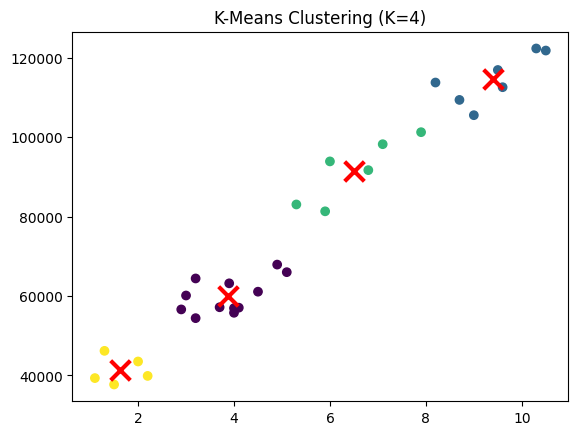

In [45]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv("Salary_Data.csv")

X = data[['YearsExperience', 'Salary']].values  # Use double square brackets to select multiple columns

# Specify the number of clusters (K)
K = 4

# Initialize the KMeans model
kmeans = KMeans(n_clusters=K)

# Fit the model to the data
kmeans.fit(X)

# Get cluster assignments for each data point
labels = kmeans.labels_

# Get cluster centers
centers = kmeans.cluster_centers_

# Plot the data points and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.title(f'K-Means Clustering (K={K})')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

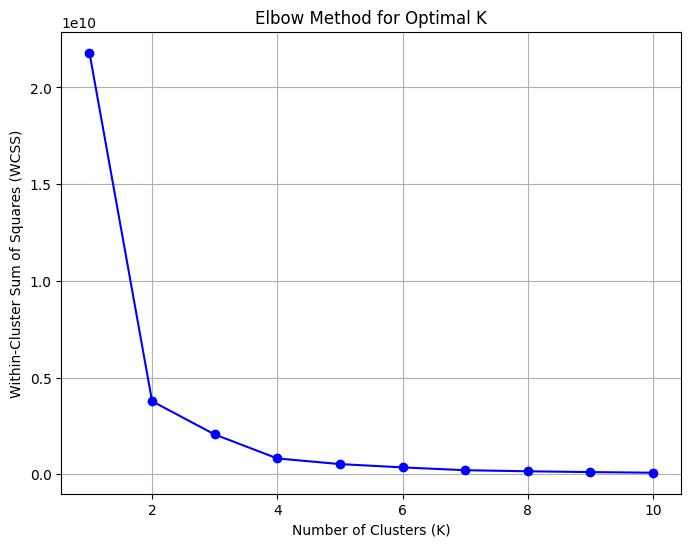

In [46]:
# ELBOW METHOD
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv("Salary_Data.csv")

# You should specify which columns from the CSV file you want to use for clustering.
# For this example, let's assume you have two columns 'X' and 'Y'.
X = data[['YearsExperience', 'Salary']].values

# Initialize a list to store the within-cluster sum of squares (WCSS) for each K
wcss = []

# Try K values from 1 to 10 (or a suitable range)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values for different K values
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.grid()
plt.show()

# Principal component analysis (PCA)

Explained Variance Ratios: [0.13338306 0.12632158]


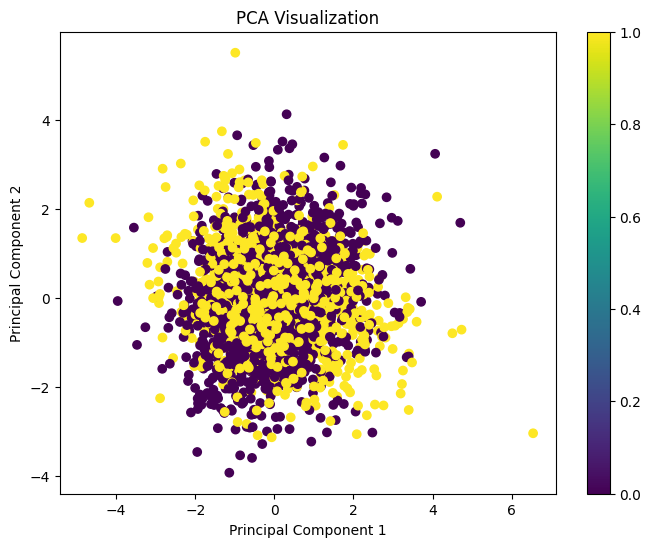

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Separate features (X) and target variable (y) if applicable
X = df.drop(columns=['Potability'])

# Identify and encode categorical variables using one-hot encoding
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Standardize the features (important for PCA)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Apply PCA
n_components = 2  # Set the number of components you want to retain
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_std)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Optional: Visualize the explained variance ratio to decide on the number of components
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance_ratio)

# Visualize the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=df['Potability'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.colorbar()
plt.show()


In [48]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier   # Replace with your classifier of choice
import numpy as np
import pandas as pd

# Split your data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    df.drop('Potability', axis=1),  # Features
    df['Potability'],  # Target variable
    test_size=0.2,  # Adjust the validation set size as needed
    random_state=42
)

# Initialize variables to keep track of the best number of components and accuracy
best_n_components = None
best_accuracy = 0.0

# Try different numbers of components and evaluate model accuracy
for n_components in range(1, X_train.shape[1] + 1):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_valid_pca = pca.transform(X_valid)

    # Train a classifier on the PCA-transformed features
    clf = KNeighborsClassifier(n_neighbors=n_components)  # Replace with your classifier of choice
    clf.fit(X_train_pca, y_train)

    # Predict on the validation set
    y_pred = clf.predict(X_valid_pca)

    # Calculate accuracy
    accuracy = accuracy_score(y_valid, y_pred)

    # Update if this number of components resulted in a better accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_components = n_components

print(f"Best number of components: {best_n_components}")
print(f"Best accuracy: {best_accuracy}")

# Now, apply PCA with the best number of components to your features and verify the DataFrame
pca = PCA(n_components=best_n_components)
features = df.drop('Potability', axis=1)  # Adjust if 'popularity' is not the target
features_pca = pca.fit_transform(features)

pca_columns = [f'PC{i+1}' for i in range(best_n_components)]
data_pca = pd.DataFrame(data=features_pca, columns=pca_columns)
data_pca['Potability'] = df['Potability']  # Adjust if 'popularity' is not the target

# Verify the new DataFrame with PCA-transformed features
print(data_pca.head())


Best number of components: 8
Best accuracy: 0.5777439024390244
           PC1         PC2        PC3        PC4        PC5       PC6  \
0 -1222.778978  137.939894 -27.202704 -23.336511 -21.206540 -4.063017   
1 -3384.000700  167.864145 -26.983268  59.761908  10.880079  0.720236   
2 -2104.556245   -7.627843  12.817520 -24.269680  -0.256173  2.590551   
3     4.298896  -63.269590 -12.913568 -24.734975 -34.496440  4.232427   
4 -4035.091061  -26.943140  16.597816  25.315488  35.036423 -2.644107   

        PC7       PC8  Potability  
0 -0.147352 -0.030330           0  
1 -0.146906  3.315474           0  
2 -1.957629 -1.301978           0  
3 -0.665050 -1.232730           0  
4  1.038170 -1.923979           0  


In [49]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Load the preprocessed dataset (replace with your actual file path)
reduced_dataset = df.copy()

# Split the dataset into features (x) and target variable (y)
x = reduced_dataset.drop("Potability", axis=1)
y = reduced_dataset["Potability"]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33,stratify=reduced_dataset['Potability'], random_state=69)

# Scale the features using StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [53]:
# Step 6: K-Nearest Neighbors (KNN) Classifier
from sklearn.neighbors import KNeighborsClassifier

# Create and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=10)  # You can adjust the number of neighbors (k) as needed
knn_model.fit(x_train_scaled, y_train)

# Make predictions on training and testing sets
y_train_pred = knn_model.predict(x_train_scaled)
y_test_pred = knn_model.predict(x_test_scaled)
y_test_pred_prob = knn_model.predict_proba(x_test_scaled)

# Evaluate the model
print("Training Accuracy Score: {}".format(accuracy_score(y_train, y_train_pred)))
print("Testing Accuracy Score: {}".format(accuracy_score(y_test, y_test_pred)))
print("ROC AUC Score: {}".format(roc_auc_score(y_test, y_test_pred_prob[:, 1])))
print("Cross-Validation Score: {}".format(cross_val_score(knn_model, x_scaled, y, cv=10, scoring='accuracy').mean()))

Training Accuracy Score: 0.7105742935278031
Testing Accuracy Score: 0.6275415896487985
ROC AUC Score: 0.6313981042654029
Cross-Validation Score: 0.6208622361452971
